# FLIPKART CUSTOMER SENTIMENT PROJECT

**Presented by:**(Pauline Ndungu, Samuel Mbugua Igecha, Leonard Rotich, Samwel Muiru, Maureen Anduuru, Henry Wamunyu)

# Business Understanding / Overview 

Flipkart are an indian e-commerce company and like many others in the e-commerce industry its important to understand customer sentiments towards the products sold on their sites. 

## Problem Statement
In the Online market, it is crucial for businesses to understand the sentiments expressed by customers towards their products.

By uncovering public sentiment , Flipkart can make data-driven decisions, that are relevant to the customers needs, this will then improve their market positioning and enhance customer satisfaction.

The aim of this project will be to generate a sentiment analysis model using Natural Language Processing procedures to precisely classify the sentiment (positive or negative) of product reviews on Flipkart.com based on the review text and summary.

# Objectives

1. Gain valuable insights into customer sentiment, public opinion, and brand perception, empowering flipkart to make informed decisions, enhance customer satisfaction, and improve overall reputation of the company.
2. Develop an NLP Application that will allow users to input new product reviews and deploy the sentiment analysis model in a production environment to classify the sentiment of reviews in real time.
3. Analyze customer sentiments and feedback regarding pricing on Flipkart. The objective could be to understand how customers perceive the value for money of different products, identify price-sensitive segments, and optimize pricing strategies to maximize sales and profitability.

# DataUnderstanding

The Dataset contains 189,874 rows and 5 columns. The column names include;

**ProductName:** Name of products

**Price:** the prices of the products(In Indian Rupees)

**Rate:** the customers' ratings out of 5

**Review:** short customer review of the products

**Summary:** more detailed review of the products

# Data Preparation

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string

# import important libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
df = pd.read_csv('Data/flipkart_product.csv', encoding='latin-1')
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


### 1.1 Data Exploration

Before any cleaning and analysis takes place, we will first explore our dataset.

In [73]:
# Function to explore our dataset
def explore_data(df):
 '''
 Print some basic statistics and information about the DataFrame
 '''
 print(f"Number of rows: {df.shape[0]}")
 print(f"Number of columns: {df.shape[1]}")
 print("--------------------------------\n")
 print("info:\n", df.info())
 print("--------------------------------\n")


explore_data(df)


# function to identify missing and duplicate values
def clean_data(df):
    print("Missing values:\n", df.isnull().sum())
    print("------------------------------------------\n")
    print("Percentage of Missing values:\n", df.isnull().sum()/len(df)*100)
    print("------------------------------------------\n")
    print("No. of duplicated values:", df.duplicated().sum())
    print("------------------------------------------\n")
    print("duplicated values:\n",  df[df.duplicated()])
    print("------------------------------------------\n")
    print("Ratings Value counts:\n",  df.Rate.value_counts())
    print("------------------------------------------\n")
    

clean_data(df)


Number of rows: 189874
Number of columns: 5
--------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB
info:
 None
--------------------------------

Missing values:
 ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64
------------------------------------------

Percentage of Missing values:
 ProductName    0.000000
Price          0.000527
Rate           0.000527
Review         0.002107
Summary        0.007373
dtype: float64
------------------------------------------

No. of duplicated values: 24861
--------------------------

### 1.2 Data Cleaning

Our dataset is messy, so we shall clean it by dropping Null values and duplicates. We shall also deal with the inconsistencies like removing symbols, punctuations, strings from our numeric data(Price, Rate columns) then will change the datatypes of Price and Rate columns from string to numeric

In [74]:
# Drop the string values in the 'Rate' column
df = df[pd.to_numeric(df['Rate'], errors='coerce').notnull()]

In [75]:
df.Rate.value_counts()

5    108694
4     39653
1     19607
3     15681
2      6234
Name: Rate, dtype: int64

- Rows containing string values from the Rate column have been confirmed to be dropped.

In [76]:
# drop null values
df = df.dropna()

In [77]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [78]:
# drop duplicates
df = df.drop_duplicates()

In [79]:
df.duplicated().sum()

0

- duplicates have been confirmed to be dropped

In [80]:
df.shape

(165000, 5)

- There's now 165,000 rows remaining in our dataset after dropping a few rows from the dataset

Now will remove punctuations, symbols, characters from price, productname columns using the regular expression("re") module. Then change datatypes of our columns as well

In [81]:
# function to remove punctuation
def rmv_punc(text):
    punct = string.punctuation
    return text.translate(str.maketrans('', '', punct))

In [82]:
# remove punctuations from price column
df['Price'] = df['Price'].apply(lambda x: rmv_punc(x))
df['Review'] = df['Review'].apply(lambda x: rmv_punc(x))

In [83]:
# remove characters
def rmv_char(text):
    text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
    text = re.sub('\s+',' ', text) #remove whitespace
    return text
# remove characters from product & Price columns
df['Price'] = df['Price'].apply(lambda x: rmv_char(x).lower())
df['ProductName']=df['ProductName'].apply(lambda x:rmv_char(x))

In [84]:
# Convert datatypes
df['Price'] = df['Price'].astype(float)
df['Rate'] = df['Rate'].astype(float)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165000 entries, 0 to 189869
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ProductName  165000 non-null  object 
 1   Price        165000 non-null  float64
 2   Rate         165000 non-null  float64
 3   Review       165000 non-null  object 
 4   Summary      165000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 7.6+ MB


- We can confirm above that the datatypes of the Price and Rate column have changed to numeric.

In [86]:
# Display cleaned dataset
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,Ok ok product


### 1.3 Text Preprocessing

We will do some text preprocessing to clean our text data(Summary). To do this we'll change it to lowercase, remove stop words, punctuation, We'll also tokenize & lemmatize our texts.

In [87]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(Summary):
    # Use list comprehension for efficient list creation
    new_Summary = [word for word in Summary.split() if word not in stop_words]
    return " ".join(new_Summary)

# Apply the function to the 'Summary' column
df['Summary'] = df['Summary'].apply(remove_stopwords)

In [88]:
# tokenize the Summary text
df['Summary'] = df.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1)
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,"[Great, cooler, .., excellent, air, flow, pric..."
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,"[Best, budget, 2, fit, cooler, ., Nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,"[The, quality, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,"[Very, bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,"[Ok, ok, product]"


In [89]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from a list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from a list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def lemmatize_list(words):
    """Lemmatize a list of words using WordNet lemmatizer"""
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    """Normalize a list of words by applying lowercase conversion, punctuation removal, and lemmatization"""
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = lemmatize_list(words)
    return ' '.join(words)

# Apply normalization to the 'Summary' column of the DataFrame
df['Summary'] = df.apply(lambda row: normalize(row['Summary']), axis=1)

# Display the updated DataFrame
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,great cooler excellent air flow price it s ama...
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cool
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,the quality good power air decent
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,very bad product fan
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,ok ok product


# Exploratory Data Analysis

We will conduct an EDA of the sentiments and ratings by creating visualizations. Then also preprocess the text data.

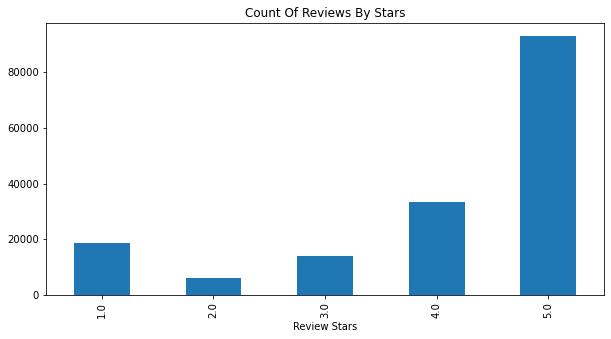

In [90]:
# Check number of reviews by stars
ax = df['Rate'].value_counts().sort_index() \
     .plot(kind='bar', title ='Count Of Reviews By Stars',
                  figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()

- From the bar plot above it's indicated that there was far more 5 star reviews of products in our dataset indicating higher positive sentiments

For further analysis we will do some feature engineering to extract the polarity scores from the reviews with the sentiments. A polarity score of 0 indicates neutral sentiment where as above 0 indicates positive sentiment and below 0 indicates negative sentiment.

Once we do this then we'll know for sure that the dataset we are exploring contains reviews with high positive sentiments. Star ratings are not a reliable metric when examining customer sentiments.

In [91]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Extract polarity scores from the Review column
df['sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments as positive, negative, or neutral
df['product_sentiment'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Check the updated DataFrame
df

,ProductName,Price,Rate,Review,Summary,sentiment,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,great cooler excellent air flow price it s ama...,0.5994,Positive
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cool,0.6249,Positive
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,the quality good power air decent,0.3182,Positive
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,very bad product fan,-0.4215,Negative
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,ok ok product,0.3182,Positive
...,...,...,...,...,...,...,...
189862,NIVEA Soft Light Moisturizer for Face Hand Bod...,142.0,4.0,Pretty good,best winter,0.7269,Positive
189865,NIVEA Soft Light Moisturizer for Face Hand Bod...,142.0,5.0,Worth every penny,very nice cream,0.2263,Positive
189866,NIVEA Soft Light Moisturizer for Face Hand Bod...,142.0,5.0,Great product,it s nice product thank much flipcart speedy s...,0.6249,Positive
189867,NIVEA Soft Light Moisturizer for Face Hand Bod...,142.0,5.0,Best in the market,thank âï,0.6369,Positive


In [92]:
# No of reviews per sentiments
df.product_sentiment.value_counts()

Positive    114314
Neutral      36374
Negative     14312
Name: product_sentiment, dtype: int64

In [93]:
# Percentage of reviews per sentiment
percentage = df['product_sentiment'].value_counts(normalize=True)
print(percentage * 100)

Positive    69.281212
Neutral     22.044848
Negative     8.673939
Name: product_sentiment, dtype: float64


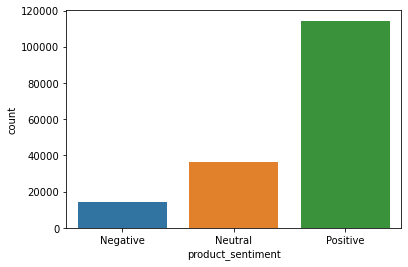

In [94]:
# Visualization of target variable/product sentiment
ax = sns.countplot(x = "product_sentiment", data = df)

- Upon closer inspection, it's confirmed there was far more positive sentiment at 69% followed by neutral sentiment at 22% and negative sentiment at 8%

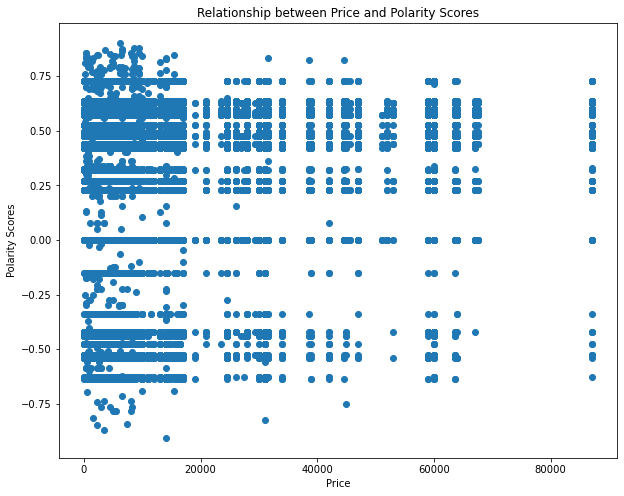

In [95]:
price = df['Price']
polarity_scores = df['sentiment']

plt.figure(figsize=(10, 8))

# Plot scatterplot
plt.scatter(price, polarity_scores)
plt.xlabel('Price')
plt.ylabel('Polarity Scores')
plt.title('Relationship between Price and Polarity Scores')
plt.show()

- There's no relationship between Price and Polarity/Customer Sentiments. It makes sense because someone could buy products of higher or lower prices and it wouldn't be a factor for positive or negative sentiments. It could all come down to other factors like quality or wait times for delivery etc.